In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import asdf
from scipy.integrate import cumulative_trapezoid

Fix for slightly 'broken' logger timeline

In [11]:
summ = pd.read_csv('../data/summary.csv')
summ.head()

expid exptype     ttrig    tspike       Fmax       Fmin       pmax
0  H254-MFCI-03    ifci  1.987743  2.497569  1157.7340 -210.44680  4479971.0
1   H254-dry-01     dry  1.987832  2.497630   762.8677 -300.95020  3695707.0
2       TEXAS01    mfci  0.317606  0.579475   321.6231  -75.17484        NaN
3       TEXAS02    mfci  0.317635  0.579426   971.8953 -110.92530        NaN
4       TEXAS03    mfci  0.317675  0.579365  1358.3870 -127.99530        NaN

In [16]:
af = asdf.open('../data/experiments.asdf', mode='r')
af.find_references()
af.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.14.3
├─history (dict)
│ └─extensions (list) ...
├─sensors (dict)
│ ├─H254-MFCI-03 (Reference)
│ ├─H254-dry-01 (Reference)
│ ├─TEXAS01 (Reference)
│ ├─TEXAS02 (Reference)
│ ├─TEXAS03 (Reference)
│ ├─TEXAS04 (Reference)
│ ├─TEXAS05 (Reference)
│ ├─TEXAS06 (Reference)
│ ├─TEXAS07 (Reference)
│ ├─TEXAS08 (Reference)
│ ├─TEXAS09 (Reference)
│ ├─TEXAS10 (Reference)
│ └─13 not shown
└─summ (dict) ...
Some nodes not shown.


In [18]:
el = af['sensors']['H254-dry-01']
el.keys()

dict_keys(['asdf_library', 'history', 'date', 'el', 'exptype', 'fields', 'force', 'id', 'mic', 'press', 'seis', 'srate', 'summ', 'time', 'trig', 'units'])

In [26]:
dry = pd.DataFrame(index=pd.Index(data=el['time']['t'], name='t'))
for col in ['trig', 'force', 'press', 'mic']:
    dry[col] = el[col]
dry.head()

trig     force    press       mic
t                                             
0.00000  0.360594 -18.16735 -5606.38 -0.000775
0.00001  0.002446 -16.87905 -5284.31 -0.000453
0.00002  0.010175 -17.52320 -5284.31 -0.000775
0.00003  0.011142 -17.84528 -5928.46 -0.003674
0.00004  0.012752 -16.87905 -5606.38 -0.002064

In [27]:
el = af['sensors']['H254-MFCI-03']

mfci = pd.DataFrame(index=pd.Index(data=el['time']['t'], name='t'))
for col in ['trig', 'force', 'press', 'mic']:
    mfci[col] = el[col]
mfci.head()

trig    force    press       mic
t                                            
0.00000  0.448843 -8.82715 -6572.61 -0.003674
0.00001  0.064928 -8.50507 -6572.61  0.009209
0.00002  0.130632 -8.82715 -6572.61  0.004700
0.00003  0.186029 -9.14922 -6572.61 -0.008827
0.00004  0.236595 -8.50507 -6250.54 -0.005928

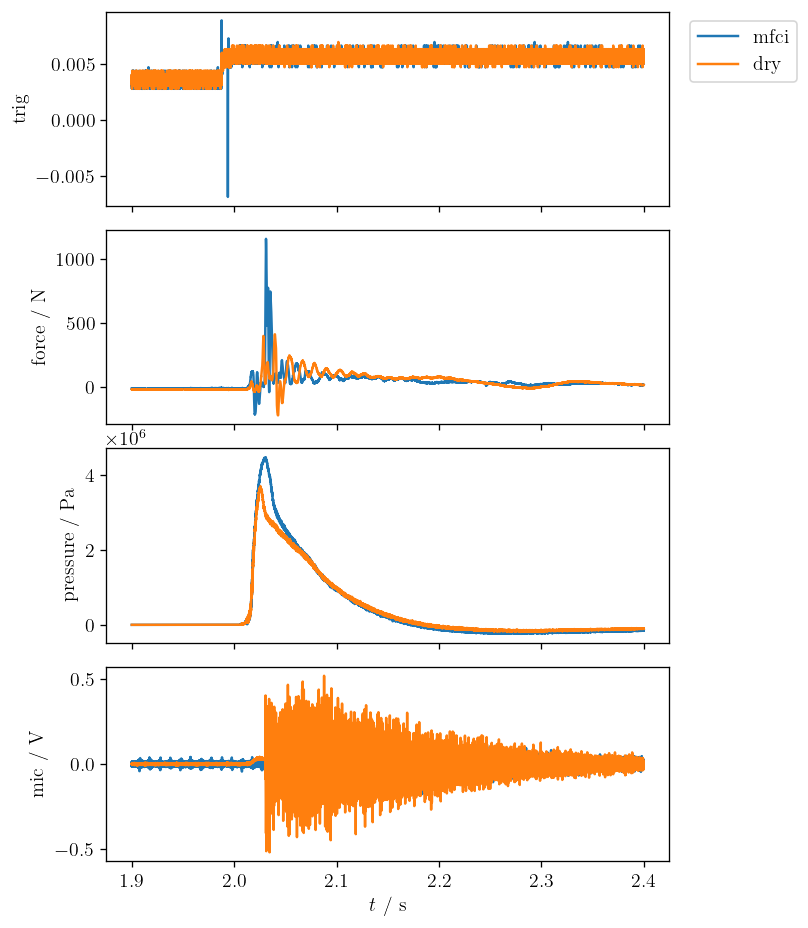

In [29]:
fig, axs = plt.subplots(nrows=4, sharex=True)

for ax, col in zip(axs, ['trig', 'force', 'press', 'mic']):
    ax.plot(mfci.loc[1.9:2.4, col], label='mfci')    
    ax.plot(dry.loc[1.9:2.4, col], label='dry')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1))
ax.set(xlabel=r'$t\ /\ \mathrm{s}$')
for ax, lbl in zip(axs, ['trig', 'force / N', 'pressure / Pa', 'mic / V']):
    ax.set_ylabel(lbl)
fig.set_size_inches(7, 8)
fig.tight_layout(pad=1, h_pad=0.)

In [30]:
ttrig = 1.987607
tend = 2.45

In [31]:
dt = 1 / SRATE
dt

1e-05

In [32]:
sel1 = dry.loc[ttrig:tend]
mmtmsq_dry = cumulative_trapezoid(sel1.force.values, dx=dt)
fsqi_dry = cumulative_trapezoid(sel1.force.values ** 2, dx=dt)
psqi_dry = cumulative_trapezoid(sel1.press.values ** 2, dx=dt)

sel2 = mfci.loc[ttrig:tend]
mmtmsq_mfci = cumulative_trapezoid(sel2.force.values, dx=dt)
fsqi_mfci = cumulative_trapezoid(sel2.force.values ** 2, dx=dt)
psqi_mfci = cumulative_trapezoid(sel2.press.values ** 2, dx=dt)

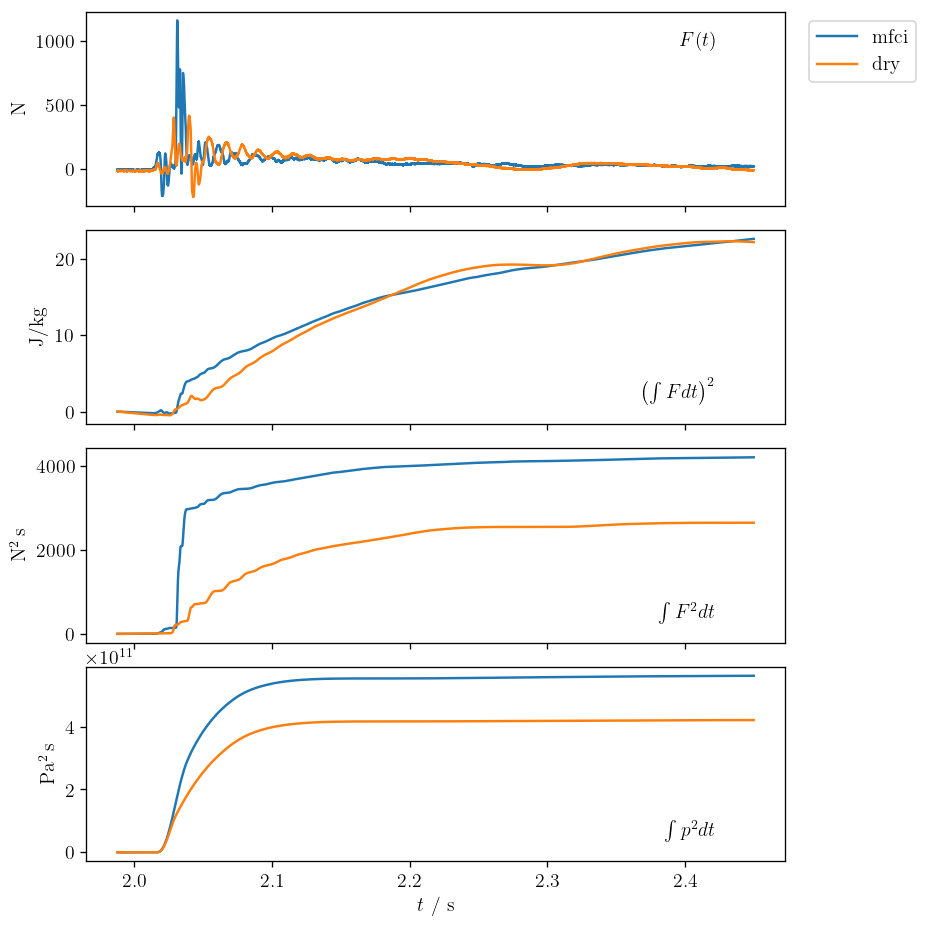

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True)

ax1.plot(sel2.force, label='mfci')
ax1.plot(sel1.force, label='dry')
ax1.text(.9, .9, r'$F(t)$', ha='right', va='top', transform=ax1.transAxes)
ax1.set(ylabel='N')
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

ax2.plot(sel2.index[1:], mmtmsq_mfci)
ax2.plot(sel1.index[1:], mmtmsq_dry)
ax2.text(.9, .1, r'$\bigl(\int F dt\bigr)^2$', ha='right', va='bottom', transform=ax2.transAxes)
ax2.set(ylabel='J/kg')

ax3.plot(sel2.index[1:], fsqi_mfci)
ax3.plot(sel1.index[1:], fsqi_dry)
ax3.text(.9, .1, r'$\int F^2 dt$', ha='right', va='bottom', transform=ax3.transAxes)
ax3.set(ylabel=r'$\mathrm{N^2\,s}$')

ax4.plot(sel2.index[1:], psqi_mfci)
ax4.plot(sel1.index[1:], psqi_dry)
ax4.text(.9, .1, r'$\int p^2 dt$', ha='right', va='bottom', transform=ax4.transAxes)
ax4.set(ylabel=r'$\mathrm{Pa^2\,s}$', xlabel=r'$t\ /\ \mathrm{s}$')

fig.set_size_inches(8, 8)
fig.tight_layout(pad=1, h_pad=0)